In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import lightgbm as lgb
import xgboost as xgb

# Load the Titanic datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")


In [12]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,False,True
887,888,1,1,0,19.0,0,0,30.0000,False,True
888,889,0,3,0,28.0,1,2,23.4500,False,True
889,890,1,1,1,26.0,0,0,30.0000,False,False


In [13]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Survived_LGBM
0,892,3,1,34.5,0,0,7.8292,True,False,0
1,893,3,0,47.0,1,0,7.0000,False,True,0
2,894,2,1,62.0,0,0,9.6875,True,False,0
3,895,3,1,27.0,0,0,8.6625,False,True,0
4,896,3,0,22.0,1,1,12.2875,False,True,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,False,True,0
414,1306,1,0,39.0,0,0,108.9000,False,False,1
415,1307,3,1,38.5,0,0,7.2500,False,True,0
416,1308,3,1,27.0,0,0,8.0500,False,True,0


In [3]:
# Exploratory Data Analysis (EDA)
print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

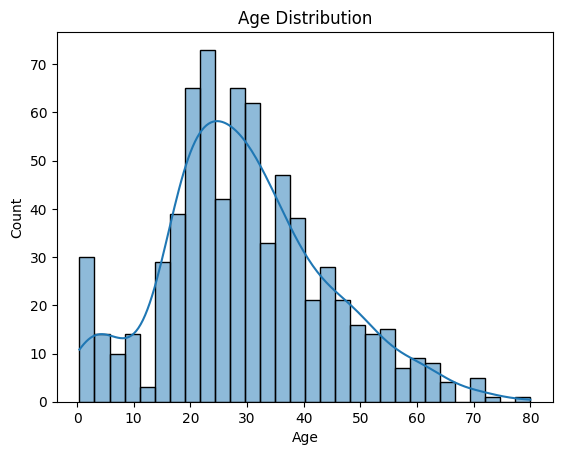

In [5]:
# Data Distribution Visualization
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()



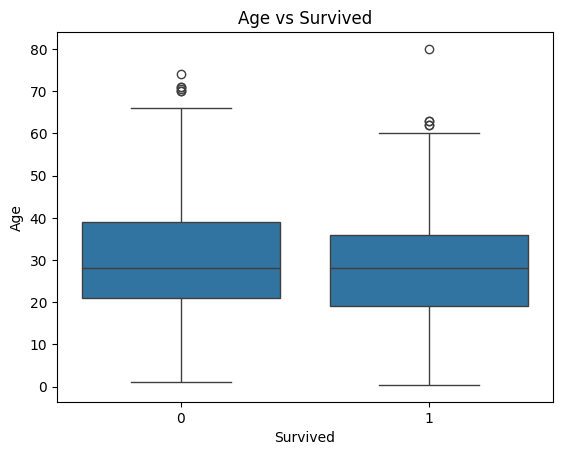

In [6]:
sns.boxplot(x=train_df['Survived'], y=train_df['Age'])
plt.title("Age vs Survived")
plt.show()


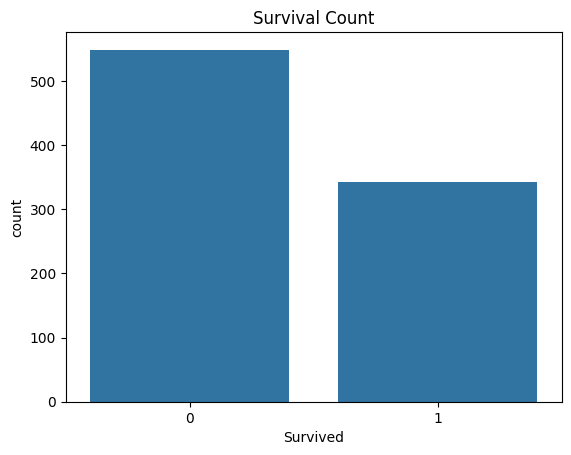

In [7]:
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()


<ipython-input-14-0d1355edc2fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-14-0d1355edc2fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
Accuracy: 0.9966329966329966
Precision: 1.0
Recall: 0.9912280701754386
F1 Score: 0.9955947136563876
Confusion Matrix:
 [[549   0]
 [  3 339]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       549
           1       1.00      0.99      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg

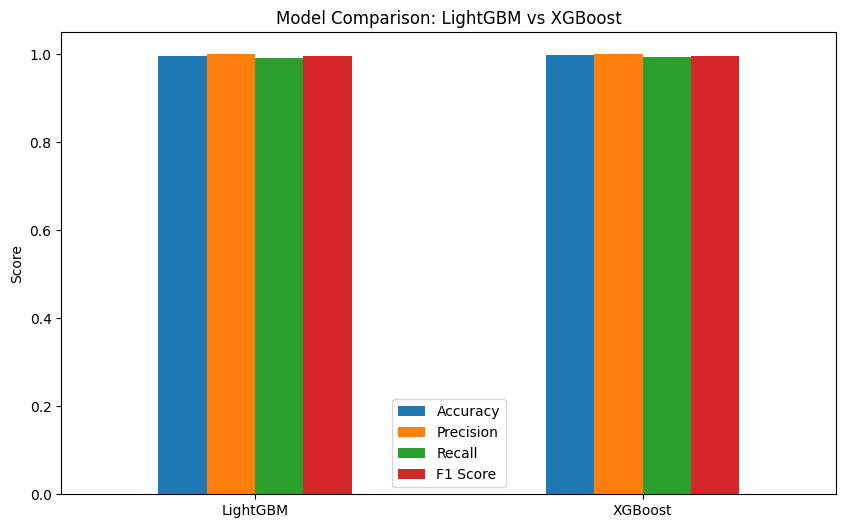

Final Comparison:
          Accuracy  Precision    Recall  F1 Score
LightGBM  0.996633        1.0  0.991228  0.995595
XGBoost   0.997755        1.0  0.994152  0.997067


In [14]:
# Data Preprocessing
# Impute missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

if 'Embarked' in train_df.columns:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
if 'Embarked' in test_df.columns:
    test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

if 'Fare' in test_df.columns:
    test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

train_df.drop(columns=['Cabin', 'Ticket', 'Name'], errors='ignore', inplace=True)
test_df.drop(columns=['Cabin', 'Ticket', 'Name'], errors='ignore', inplace=True)

# Encode categorical variables
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])
train_df = pd.get_dummies(train_df, columns=['Embarked_Q'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked_S'], drop_first=True)

# Ensure test dataset has same columns as train
missing_cols = set(train_df.columns) - set(test_df.columns) - {'Survived'}
for col in missing_cols:
    test_df[col] = 0

test_df = test_df.reindex(columns=train_df.columns.drop('Survived'), fill_value=0)

# Split dataset into training and testing sets
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']
X_test = test_df

# Model Training & Evaluation Functions
def evaluate_model(model, X_train, y_train):
    y_pred = model.predict(X_train)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred]
    print("Accuracy:", accuracy_score(y_train, y_pred))
    print("Precision:", precision_score(y_train, y_pred))
    print("Recall:", recall_score(y_train, y_pred))
    print("F1 Score:", f1_score(y_train, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
    print("Classification Report:\n", classification_report(y_train, y_pred))

# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
evaluate_model(lgb_model, X_train, y_train)

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_train, y_train)

# Predict on test dataset
X_test_filtered = X_test.drop(columns=['Survived_LGBM'], errors='ignore')  # Ensure no extra columns
test_df['Survived_LGBM'] = lgb_model.predict(X_test_filtered)
test_df['Survived_XGB'] = xgb_model.predict(X_test_filtered)

# Save predictions
test_df[['PassengerId', 'Survived_LGBM', 'Survived_XGB']].to_csv("Titanic_predictions.csv", index=False)

# Comparative Analysis
models = ['LightGBM', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

lgb_scores = [
    accuracy_score(y_train, lgb_model.predict(X_train)),
    precision_score(y_train, lgb_model.predict(X_train)),
    recall_score(y_train, lgb_model.predict(X_train)),
    f1_score(y_train, lgb_model.predict(X_train))
]

xgb_scores = [
    accuracy_score(y_train, xgb_model.predict(X_train)),
    precision_score(y_train, xgb_model.predict(X_train)),
    recall_score(y_train, xgb_model.predict(X_train)),
    f1_score(y_train, xgb_model.predict(X_train))
]

scores_df = pd.DataFrame([lgb_scores, xgb_scores], columns=metrics, index=models)
scores_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

print("Final Comparison:")
print(scores_df)
